<a href="https://colab.research.google.com/github/nasehacho/data-analytics-projects/blob/master/COVID19_TEST_AND_VARIANTS_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Test and Variants Data Analysis 

**Description:** This script will read the latest data from the New York City Health Department COVID-19 database on testing, variants, and confirmed cases at https://github.com/nychealth/coronavirus-data/blob/master/trends/tests.csv, https://github.com/nychealth/coronavirus-data/blob/master/variants/variant-epi-data.csv, and https://github.com/nychealth/coronavirus-data/blob/master/variants/variant-classification.csv. 

**Task:** Filter the data to discover patterns and trends within COVID-19 testing and COVID-19 variants. 

# Task 1: Enviornment Set Up

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
covid_test_df = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/tests.csv')

In [3]:
covid_variant_df = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/variants/variant-epi-data.csv')

In [4]:
covid_variant_classification_df = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/variants/variant-classification.csv')

# Task 2: About Covid Test Dataframe 

In [ ]:
type(covid_test_df)

pandas.core.frame.DataFrame

In [ ]:
covid_test_df.shape

(1121, 10)

There are 1121 rows and 10 columns 

In [ ]:
covid_test_df.columns

Index(['DATE', 'TOTAL_TESTS', 'POSITIVE_TESTS', 'PERCENT_POSITIVE',
       'TOTAL_TESTS_7DAYS_AVG', 'POSITIVE_TESTS_7DAYS_AVG',
       'PERCENT_POSITIVE_7DAYS_AVG', 'TOTAL_ANTIGEN_TESTS',
       'TOTAL_ANTIGEN_TESTS_7DAYS_AVG', 'INCOMPLETE'],
      dtype='object')

In [ ]:
covid_test_df

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,TOTAL_TESTS_7DAYS_AVG,POSITIVE_TESTS_7DAYS_AVG,PERCENT_POSITIVE_7DAYS_AVG,TOTAL_ANTIGEN_TESTS,TOTAL_ANTIGEN_TESTS_7DAYS_AVG,INCOMPLETE
0,03/03/2020,15,1,0.0667,0,0,0.0000,0,0,0
1,03/04/2020,40,5,0.1250,0,0,0.0000,0,0,0
2,03/05/2020,66,4,0.0606,0,0,0.0000,0,0,0
3,03/06/2020,89,8,0.0899,0,0,0.0000,0,0,0
4,03/07/2020,77,8,0.1039,0,0,0.0000,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1116,03/24/2023,13511,439,0.0325,11900,396,0.0333,2694,2773,42000
1117,03/25/2023,6286,222,0.0353,11875,392,0.0330,1863,2736,42000
1118,03/26/2023,5863,237,0.0404,11874,396,0.0334,2092,2745,42000
1119,03/27/2023,15689,486,0.0310,11370,383,0.0337,3454,2714,42000


In [ ]:
covid_test_df.count()

DATE                             1121
TOTAL_TESTS                      1121
POSITIVE_TESTS                   1121
PERCENT_POSITIVE                 1121
TOTAL_TESTS_7DAYS_AVG            1121
POSITIVE_TESTS_7DAYS_AVG         1121
PERCENT_POSITIVE_7DAYS_AVG       1121
TOTAL_ANTIGEN_TESTS              1121
TOTAL_ANTIGEN_TESTS_7DAYS_AVG    1121
INCOMPLETE                       1121
dtype: int64

In [ ]:
covid_test_df.max()

DATE                             12/31/2022
TOTAL_TESTS                          199315
POSITIVE_TESTS                        66961
PERCENT_POSITIVE                     0.7117
TOTAL_TESTS_7DAYS_AVG                134081
POSITIVE_TESTS_7DAYS_AVG              44226
PERCENT_POSITIVE_7DAYS_AVG           0.6813
TOTAL_ANTIGEN_TESTS                   58019
TOTAL_ANTIGEN_TESTS_7DAYS_AVG         41359
INCOMPLETE                            42000
dtype: object

In [ ]:
covid_test_df.describe()

,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,TOTAL_TESTS_7DAYS_AVG,POSITIVE_TESTS_7DAYS_AVG,PERCENT_POSITIVE_7DAYS_AVG,TOTAL_ANTIGEN_TESTS,TOTAL_ANTIGEN_TESTS_7DAYS_AVG,INCOMPLETE
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,42982.054416,2988.217663,0.081492,39344.880464,2836.390723,0.080293,10370.563782,9681.827832,262.265834
std,30214.488314,5898.382266,0.103512,22022.543889,5147.083195,0.103308,8923.131078,7754.795269,3310.008341
min,15.000000,1.000000,0.004200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20747.000000,761.000000,0.021000,22107.000000,742.000000,0.019100,3860.000000,4328.000000,0.000000
50%,33981.000000,1801.000000,0.053000,36728.000000,1782.000000,0.054700,9128.000000,8887.000000,0.000000
75%,64199.000000,3321.000000,0.100300,53319.000000,3242.000000,0.092500,14539.000000,14520.000000,0.000000
max,199315.000000,66961.000000,0.711700,134081.000000,44226.000000,0.681300,58019.000000,41359.000000,42000.000000


In [ ]:
covid_test_df.tail(30)

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,TOTAL_TESTS_7DAYS_AVG,POSITIVE_TESTS_7DAYS_AVG,PERCENT_POSITIVE_7DAYS_AVG,TOTAL_ANTIGEN_TESTS,TOTAL_ANTIGEN_TESTS_7DAYS_AVG,INCOMPLETE
1097,03/05/2023,6837,285,0.0417,15557,562,0.0361,2142,3177,0
1098,03/06/2023,25289,685,0.0271,15261,519,0.0340,4179,3135,0
1099,03/07/2023,20566,575,0.0280,15404,505,0.0328,3445,3143,0
1100,03/08/2023,15745,587,0.0373,15268,501,0.0328,3335,3096,0
1101,03/09/2023,27150,489,0.0180,14870,483,0.0325,2928,2981,0
1102,03/10/2023,15250,448,0.0294,14909,468,0.0314,2853,2951,0
1103,03/11/2023,6793,299,0.0440,14759,463,0.0314,887,2742,0
1104,03/12/2023,5947,257,0.0432,14619,458,0.0313,2077,2727,0
1105,03/13/2023,23551,539,0.0229,14298,438,0.0307,3618,2654,0
1106,03/14/2023,18365,457,0.0249,13997,423,0.0302,2954,2585,0


In [ ]:
#new dataframe to showcase the last 30 days recorded
covid_test_new = covid_test_df.tail(30)
covid_test_new

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,TOTAL_TESTS_7DAYS_AVG,POSITIVE_TESTS_7DAYS_AVG,PERCENT_POSITIVE_7DAYS_AVG,TOTAL_ANTIGEN_TESTS,TOTAL_ANTIGEN_TESTS_7DAYS_AVG,INCOMPLETE
1097,03/05/2023,6837,285,0.0417,15557,562,0.0361,2142,3177,0
1098,03/06/2023,25289,685,0.0271,15261,519,0.0340,4179,3135,0
1099,03/07/2023,20566,575,0.0280,15404,505,0.0328,3445,3143,0
1100,03/08/2023,15745,587,0.0373,15268,501,0.0328,3335,3096,0
1101,03/09/2023,27150,489,0.0180,14870,483,0.0325,2928,2981,0
1102,03/10/2023,15250,448,0.0294,14909,468,0.0314,2853,2951,0
1103,03/11/2023,6793,299,0.0440,14759,463,0.0314,887,2742,0
1104,03/12/2023,5947,257,0.0432,14619,458,0.0313,2077,2727,0
1105,03/13/2023,23551,539,0.0229,14298,438,0.0307,3618,2654,0
1106,03/14/2023,18365,457,0.0249,13997,423,0.0302,2954,2585,0


Total Tests Vs. Positive Tests (Count Or Percent) 

<Axes: xlabel='TOTAL_TESTS', ylabel='PERCENT_POSITIVE'>

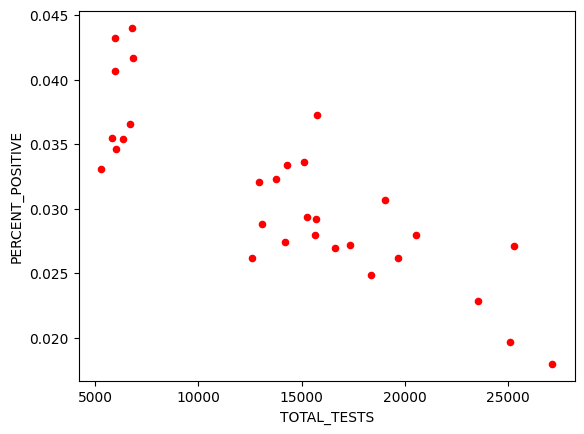

In [ ]:
covid_test_new.plot(x='TOTAL_TESTS',y='PERCENT_POSITIVE',color='red', kind='scatter')

Over the last 30 days, the percent of positive tests filed with reference to the total amount of tests taken, decreases as the the total amount of tests filed increases showcasing a negative relationship between the two variables. This can point to the fact that of the tests that have been filed in this database, there is not an overwhelming amount of positive cases noted as of recently in New York. 

In [ ]:
#Create new dataframe to showcase the first 30 days recorded
covid_test_df.head(30)
covid_test_old = covid_test_df.head(30)
covid_test_old

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,TOTAL_TESTS_7DAYS_AVG,POSITIVE_TESTS_7DAYS_AVG,PERCENT_POSITIVE_7DAYS_AVG,TOTAL_ANTIGEN_TESTS,TOTAL_ANTIGEN_TESTS_7DAYS_AVG,INCOMPLETE
0,03/03/2020,15,1,0.0667,0,0,0.0000,0,0,0
1,03/04/2020,40,5,0.1250,0,0,0.0000,0,0,0
2,03/05/2020,66,4,0.0606,0,0,0.0000,0,0,0
3,03/06/2020,89,8,0.0899,0,0,0.0000,0,0,0
4,03/07/2020,77,8,0.1039,0,0,0.0000,1,0,0
5,03/08/2020,113,21,0.1858,0,0,0.0000,0,0,0
6,03/09/2020,409,60,0.1467,113,15,0.1290,44,0,0
7,03/10/2020,482,73,0.1515,178,24,0.1370,0,0,0
8,03/11/2020,817,164,0.2007,288,46,0.1603,0,0,0
9,03/12/2020,1621,369,0.2276,506,97,0.1910,0,0,0


<Axes: xlabel='TOTAL_TESTS', ylabel='PERCENT_POSITIVE'>

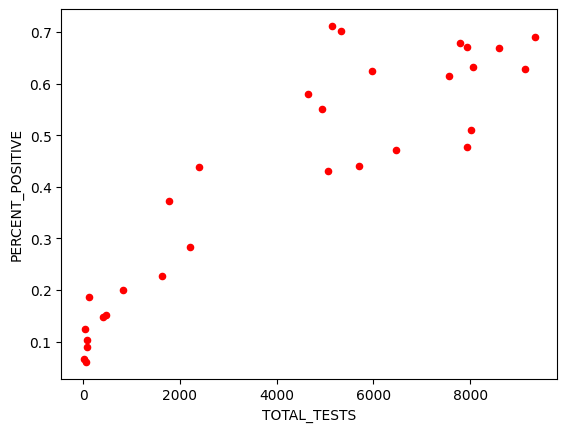

In [ ]:
covid_test_old.plot(x='TOTAL_TESTS',y='PERCENT_POSITIVE',color='red', kind='scatter')

In contrast, during the first 30 days in which this database has recorded data, there is a positive relationship seen with the total tests taken and the amount that came out to be positive tests. This is reasonable considering the data recorded the height of the pandemic before vaccines were created for the virus. 

##Antigen Testing

Antigens are generally described as anything that is capable of causing an immune response within the body. Antigen tests refer to the rapid testing involved in COVID-19 diagnosis. The idea is that the rapid test utilizes your given sample to detect if the COVID-19 antigen is present within the sample. Although antigen testing is capable of giving out a positive test result, it is also capable of providing a false-negative. This is due to the fact that:
1.  Antigen testing does not cover the various variants of COVID-19
2.  Antigen testing can only detect the presence of an antigen if there are high loads of it present in the body and is thus subject to time sensitivity 





Total Tests Vs. Antigen Tests (Count or Percent) 

<Axes: xlabel='TOTAL_TESTS', ylabel='TOTAL_ANTIGEN_TESTS'>

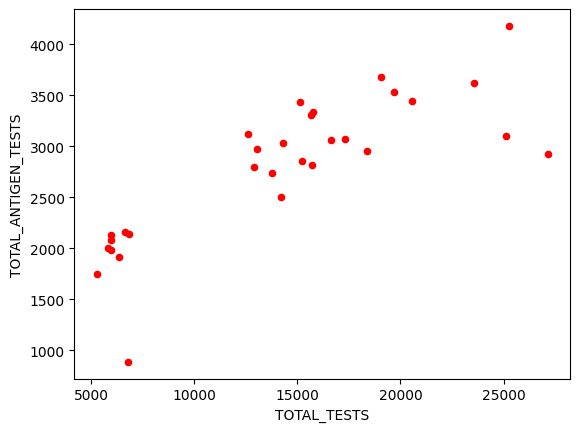

In [ ]:
covid_test_new.plot(x='TOTAL_TESTS',y='TOTAL_ANTIGEN_TESTS',color='red', kind='scatter')

In the past month, the amount of antigen tests taken in accordance to the overall amount of tests taken is low. Only averaging at about 16-30% of total tests taken this shows that despite the convenience of antigen tests, individuals in New York majorly prefer taking alternative testing like PCR testing which garners more accurate results. 

Positive Test Vs. Antigen Tests(Count or Percent or 7 Days Average) 

<Axes: xlabel='TOTAL_ANTIGEN_TESTS_7DAYS_AVG', ylabel='POSITIVE_TESTS_7DAYS_AVG'>

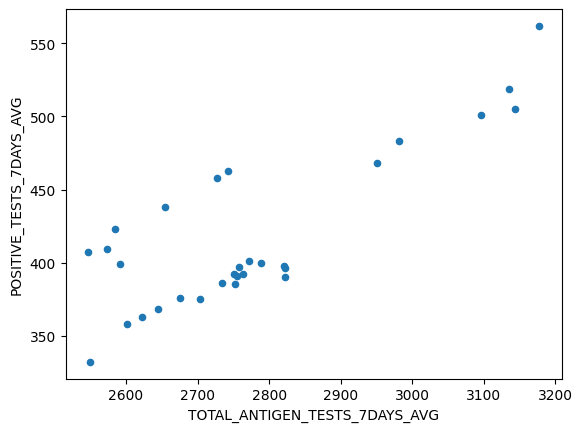

In [ ]:
covid_test_new.plot(x='TOTAL_ANTIGEN_TESTS_7DAYS_AVG',y='POSITIVE_TESTS_7DAYS_AVG', kind='scatter')

Over the past 30 days, there have been less positive test results coming from antigen tests during the average 7 day period. This statistic may not be accurate as it is possible to receive a false negative in antigen testing. However despite that notion, it can be said that the majority of antigen testing had not equate to positive test results with at its highest only averaging about 18% of antigen tests being positive. 

# About Covid Variant Dataframe

In [5]:
covid_variant_df 

,Sequence week,B.1.526 +E484K count,B.1.526 +E484K percent,B.1.526 no E484K count,B.1.526 no E484K percent,B.1.1.7 count,B.1.1.7 percent,P.1 count,P.1 percent,B.1.427 count,...,BQ.1.1 percent,XBB count,XBB percent,XBB.1.5 count,XBB.1.5 percent,Omicron other count,Omicron other percent,Other count,Other percent,incomplete
0,01/02/2021,3,0,33,5,4,1,0,0,1,...,0,0,0,0,0,0,0,571,92,NaN
1,01/09/2021,8,1,50,6,9,1,0,0,5,...,0,0,0,0,0,0,0,788,90,NaN
2,01/16/2021,3,1,50,12,13,3,0,0,5,...,0,0,0,0,0,0,0,332,80,NaN
3,01/23/2021,12,2,56,12,8,2,0,0,1,...,0,0,0,0,0,0,0,398,82,NaN
4,01/30/2021,50,6,133,17,24,3,0,0,11,...,0,0,0,0,0,0,0,550,70,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,02/25/2023,0,0,0,0,0,0,0,0,0,...,2,9,4,227,91,0,0,0,0,NaN
113,03/04/2023,0,0,0,0,0,0,0,0,0,...,5,13,4,324,88,1,0,0,0,NaN
114,03/11/2023,0,0,0,0,0,0,0,0,0,...,4,11,4,283,92,0,0,0,0,NaN
115,03/18/2023,0,0,0,0,0,0,0,0,0,...,4,19,9,189,85,0,0,2,1,7170.0


In [6]:
covid_variant_classification_df

,variant,name,count,total,percent_in_NYC
0,B.1.1.529,Omicron,1028,1030,100
1,B.1.1.7,Alpha,0,1030,0
2,B.1.351,Beta,0,1030,0
3,B.1.427,Epsilon,0,1030,0
4,B.1.429,Epsilon,0,1030,0
5,B.1.525,Eta,0,1030,0
6,B.1.526,Iota,0,1030,0
7,B.1.617.2,Delta,0,1030,0
8,B.1.621,NaN,0,1030,0
9,P.1,Gamma,0,1030,0


In [7]:
covid_variant_df.max()

Sequence week               12/31/2022
B.1.526 +E484K count               493
B.1.526 +E484K  percent             24
B.1.526 no E484K count             414
B.1.526 no E484K percent            31
B.1.1.7 count                      786
B.1.1.7 percent                     48
P.1 count                           55
P.1 percent                         15
B.1.427 count                       13
B.1.427 percent                      1
B.1.429 count                       24
B.1.429 percent                      3
B.1.351 count                        8
B.1.351 percent                      0
B.1.617.2 count                   2181
B.1.617.2 percent                  100
B.1.621 count                       34
B.1.621 percent                     19
BA.1 count                        7124
BA.1 percent                        99
BA.2 count                        1661
BA.2 percent                        79
BA.2.12.1 count                   2692
BA.2.12.1 percent                   67
BA.2.75 count            

The most prominent variants of COVID-19 within New York City had been the Alpha *B.1.1.7*, Delta *B.1.617.2*, and Omicron *B.1.1.529* variants with Omicron having various subvariants (*BA.5, XBB.1.5, BA.1...*)that plagued the city. 





##About Variants 

The preceding charts indicate the amount of variants that are prevalent within New York City since January 2021. Variants are a result of mutations that occur within the genetic material of a virus as it replicates. For the sake of concision, the data on the Alpha, Delta, and Omicron variants that plagued the city will be analyzed. 

In [10]:
covid_variant_df.tail(30)
covid_variant_new=covid_variant_df.tail(30)
covid_variant_new

,Sequence week,B.1.526 +E484K count,B.1.526 +E484K percent,B.1.526 no E484K count,B.1.526 no E484K percent,B.1.1.7 count,B.1.1.7 percent,P.1 count,P.1 percent,B.1.427 count,...,BQ.1.1 percent,XBB count,XBB percent,XBB.1.5 count,XBB.1.5 percent,Omicron other count,Omicron other percent,Other count,Other percent,incomplete
87,09/03/2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,NaN
88,09/10/2022,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,6,0,NaN
89,09/17/2022,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,NaN
90,09/24/2022,0,0,0,0,0,0,0,0,0,...,1,6,0,0,0,0,0,0,0,NaN
91,10/01/2022,0,0,0,0,0,0,0,0,0,...,3,7,0,0,0,0,0,2,0,NaN
92,10/08/2022,0,0,0,0,0,0,0,0,0,...,7,10,1,0,0,0,0,1,0,NaN
93,10/15/2022,0,0,0,0,0,0,0,0,0,...,12,26,2,0,0,0,0,1,0,NaN
94,10/22/2022,0,0,0,0,0,0,0,0,0,...,15,36,3,0,0,1,0,0,0,NaN
95,10/29/2022,0,0,0,0,0,0,0,0,0,...,22,60,5,1,0,0,0,4,0,NaN
96,11/05/2022,0,0,0,0,0,0,0,0,0,...,24,92,5,13,1,0,0,1,0,NaN


In [11]:
covid_variant_new.max()

Sequence week               12/31/2022
B.1.526 +E484K count                 0
B.1.526 +E484K  percent              0
B.1.526 no E484K count               0
B.1.526 no E484K percent             0
B.1.1.7 count                        0
B.1.1.7 percent                      0
P.1 count                            0
P.1 percent                          0
B.1.427 count                        0
B.1.427 percent                      0
B.1.429 count                        0
B.1.429 percent                      0
B.1.351 count                        0
B.1.351 percent                      0
B.1.617.2 count                      1
B.1.617.2 percent                    0
B.1.621 count                        0
B.1.621 percent                      0
BA.1 count                           3
BA.1 percent                         0
BA.2 count                          21
BA.2 percent                         2
BA.2.12.1 count                      5
BA.2.12.1 percent                    0
BA.2.75 count            

The most prevalent subvariants of Omicron in the last 30 days are XBB.1.5 and BA.5. While there seems to be no cases of Alpha and Delta variants in the last 30 days of this data set. 

<Axes: xlabel='Sequence week'>

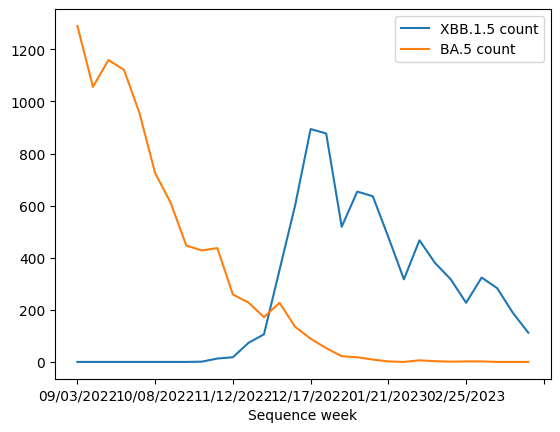

In [22]:
covid_variant_new.plot(x='Sequence week',y=['XBB.1.5 count','BA.5 count'], kind='line')

From this chart, it can be seen that the BA.5 subvariant had been prevalent in September of last year but decreased as we reach to present day. In contrast, the XBB.1.5 variant seems to have gained prevalence over time in the last 30 days of this data set. However, it is important to note that both variants are seemingly heading towards a decrease in cases and a plateau state. 

In [23]:
covid_variant_df.head(30)
covid_variant_old=covid_variant_df.head(30)
covid_variant_old

,Sequence week,B.1.526 +E484K count,B.1.526 +E484K percent,B.1.526 no E484K count,B.1.526 no E484K percent,B.1.1.7 count,B.1.1.7 percent,P.1 count,P.1 percent,B.1.427 count,...,BQ.1.1 percent,XBB count,XBB percent,XBB.1.5 count,XBB.1.5 percent,Omicron other count,Omicron other percent,Other count,Other percent,incomplete
0,01/02/2021,3,0,33,5,4,1,0,0,1,...,0,0,0,0,0,0,0,571,92,NaN
1,01/09/2021,8,1,50,6,9,1,0,0,5,...,0,0,0,0,0,0,0,788,90,NaN
2,01/16/2021,3,1,50,12,13,3,0,0,5,...,0,0,0,0,0,0,0,332,80,NaN
3,01/23/2021,12,2,56,12,8,2,0,0,1,...,0,0,0,0,0,0,0,398,82,NaN
4,01/30/2021,50,6,133,17,24,3,0,0,11,...,0,0,0,0,0,0,0,550,70,NaN
5,02/06/2021,77,8,210,21,78,8,0,0,8,...,0,0,0,0,0,0,0,618,61,NaN
6,02/13/2021,38,4,328,31,99,9,0,0,13,...,0,0,0,0,0,0,0,575,54,NaN
7,02/20/2021,143,12,267,23,92,8,0,0,13,...,0,0,0,0,0,0,0,633,54,NaN
8,02/27/2021,181,16,275,25,141,13,0,0,5,...,0,0,0,0,0,0,0,493,44,NaN
9,03/06/2021,185,18,317,31,156,15,0,0,9,...,0,0,0,0,0,0,0,336,33,NaN


In [24]:
covid_variant_old.max()

Sequence week               07/24/2021
B.1.526 +E484K count               493
B.1.526 +E484K  percent             24
B.1.526 no E484K count             414
B.1.526 no E484K percent            31
B.1.1.7 count                      786
B.1.1.7 percent                     48
P.1 count                           55
P.1 percent                         15
B.1.427 count                       13
B.1.427 percent                      1
B.1.429 count                       24
B.1.429 percent                      3
B.1.351 count                        8
B.1.351 percent                      0
B.1.617.2 count                    695
B.1.617.2 percent                   93
B.1.621 count                       34
B.1.621 percent                     19
BA.1 count                           2
BA.1 percent                         0
BA.2 count                           0
BA.2 percent                         0
BA.2.12.1 count                      0
BA.2.12.1 percent                    0
BA.2.75 count            

In contrast to the last 30 days, the first 30 days of this dataset showcase that the most prevalent variants of COVID-19 had been the Alpha and Delta variants in 2021. 

<Axes: xlabel='Sequence week'>

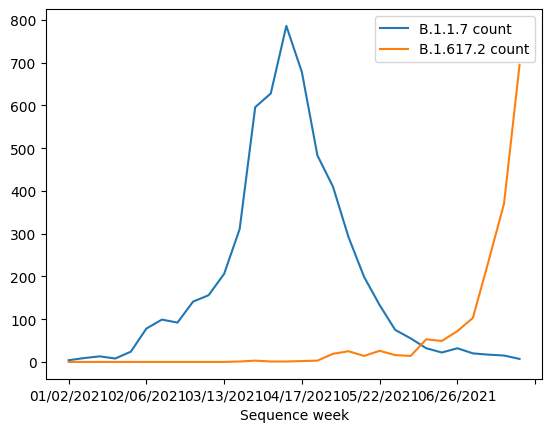

In [29]:
covid_variant_old.plot(x='Sequence week',y=['B.1.1.7 count','B.1.617.2 count'], kind='line')

From this line plot, it can be seen that the Alpha variant had a peak of about 800 cases (786 based off of the chart) during the early months of 2021 and drastically decreased as the year went on. In contrast, the Delta variant increased in cases over time, reaching a high of about 700 cases (695 based off of the chart) in June of 2021 and still shows it had been increasing thereafter. 